#    OMNIVIDA
    
Para esta prueba se aplicaran los pasos que todo cientifico de datos debe seguir a la hora de generar conocimiento que permita tomar decisiones poderosas para la organizacion es por esto que se utilizara la metodologia CRISP-DM . Se empezara con cargue de datos , analisis de nulos y outliers, analisis descriptivo o exploratorio , se usaran graficos para encontrar insights , se responderan las preguntas planteadas en el ejercicio y finalmente se buscara implementar un modelo de machine learning para el caso de estudio.

In [ ]:
pip install pandas #Instalamos no solo pandas sino los que necesitemos en caso de no tenerlos instalados en el entorno


In [2]:
#Importamos los paquetes a usar en el ejercicio

import pandas as pd   # tratamiento de datos
import seaborn as sb # interfaz grafica
import numpy as np  # tratamiento de matrices y data frames
import matplotlib.pyplot as plt  # graficos
from datetime import datetime #convertir a fechas
import time
import re

In [15]:
#Cargamos el data set de homicidios y observamos su estructura
dh=pd.read_excel("Datos basicos.xlsx")
dh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   888 non-null    int64  
 1   edad                 887 non-null    float64
 2   genero               886 non-null    object 
 3   escolaridad          877 non-null    object 
 4   EstadoCivil          878 non-null    object 
 5   Preferencia          202 non-null    object 
 6   Departamento         886 non-null    object 
 7   Ciudad               886 non-null    object 
 8   Estrato              887 non-null    float64
 9   Zona                 887 non-null    object 
 10  AcompaÃ±ante         861 non-null    object 
 11  NivelSocioEconomico  871 non-null    object 
 12  Ocupacion            861 non-null    object 
 13  Regimen              861 non-null    object 
 14  TipoAfiliacion       861 non-null    object 
 15  RelacionLaboral      861 non-null    obj

Segun el data set nos encontramos con 16 columnas y 888 filas(clientes) con sus diferentes tipos de datos. Se debe realizar una transformacion debido a que algunos tipos de datos no siguen su naturaleza string , float , numeric , date. Encontramos datos nulos o vacios para la variable preferencia por lo que debemos de convertir nulo en no responde

In [21]:
dh.columns

Index(['ID', 'edad', 'genero', 'escolaridad', 'EstadoCivil', 'Preferencia',
       'Departamento', 'Ciudad', 'Estrato', 'Zona', 'AcompaÃ±ante',
       'NivelSocioEconomico', 'Ocupacion', 'Regimen', 'TipoAfiliacion',
       'RelacionLaboral', 'FE_NACIMIENTO'],
      dtype='object')

In [16]:
#Observamos el encabezado 
dh.head()


,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


In [17]:
#Observamos el final del data set
dh.tail()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
883,1997065,9.0,M,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2011-03-20 00:00:00
884,1997825,28.0,F,UNIVERSITARIO,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,B,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1991-12-27 00:00:00
885,1998401,50.0,F,SECUNDARIA,CASADO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,AMA DE CASA,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1970-01-11 00:00:00
886,1999536,28.0,F,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,CALDAS,MANIZALES,4.0,URBANA,PACIENTE,B,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1991-09-10 00:00:00
887,1999629,21.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,COTIZANTE,SIN EMPLEO,1998-11-14 00:00:00


Podemos observar un valor nulo en el ultimo registro del data set el cual debemos limpiar

# Transormacion de variables 

Vamos a convertir las variables a su naturaleza indicadas para poder trabajar el dataset 
Convertiremos a formato fecha  y strings los que sean necesarios.

In [23]:

dh["Estrato"]=dh["Estrato"].astype("category") # convertir a categoria ya que es una variable ordinal
dh["Preferencia"]=dh["Preferencia"].replace({"":"No responde"})# reemplazo "" por no responde 
dh["NivelSocioEconomico"]=dh["NivelSocioEconomico"].astype("category")


Vamos a verificar que los datos hayan quedado listos para trabajar

In [26]:
dh.head()
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   888 non-null    int64   
 1   edad                 887 non-null    float64 
 2   genero               886 non-null    object  
 3   escolaridad          877 non-null    object  
 4   EstadoCivil          878 non-null    object  
 5   Preferencia          202 non-null    object  
 6   Departamento         886 non-null    object  
 7   Ciudad               886 non-null    object  
 8   Estrato              887 non-null    category
 9   Zona                 887 non-null    object  
 10  AcompaÃ±ante         861 non-null    object  
 11  NivelSocioEconomico  871 non-null    category
 12  Ocupacion            861 non-null    object  
 13  Regimen              861 non-null    object  
 14  TipoAfiliacion       861 non-null    object  
 15  RelacionLaboral      86

# Analisis exploratorio de datos

En esta fase aplicaremos estadisticas descriptivas , tablas de contingencia y graficos para entender mejor los datos y responder las preguntas de negocio.

In [40]:
#Aplicamos descriptivos a los datos cuantitativos para conocerlos
dh.describe(include="all").round()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
count,888.0,887.0,886,877,878,202,886,886,887.0,887,861,871,861,861,861,861,887
unique,NaN,NaN,2,8,6,3,12,52,7.0,2,10,6,8,4,3,5,861
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2004-05-12 00:00:00
freq,NaN,NaN,617,390,420,192,703,470,540.0,853,531,637,463,837,536,477,3
mean,1259328.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,432658.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,500547.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,890099.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1254720.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1645597.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Entendimiento usuarios Omnivida

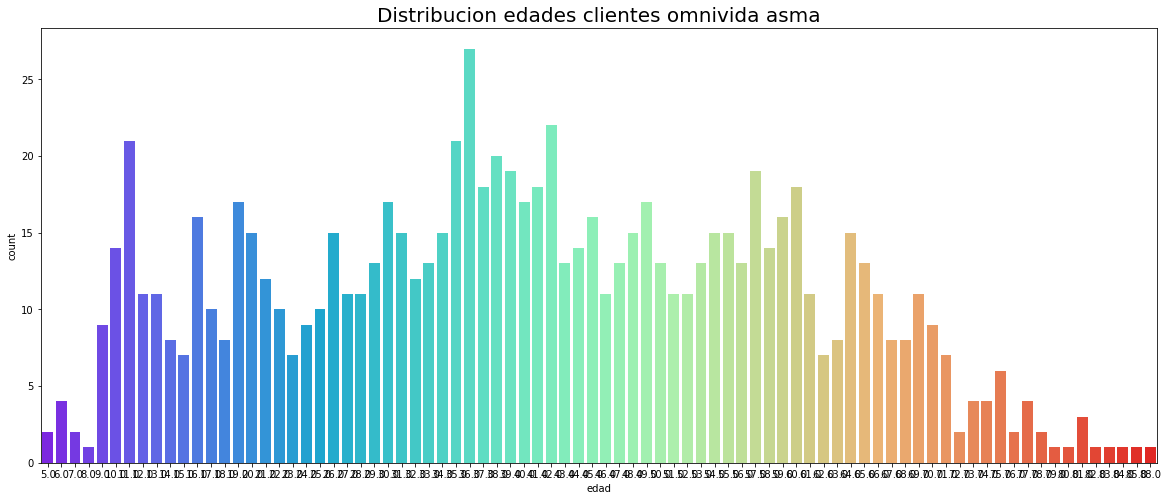

In [50]:
plt.rcParams['figure.figsize'] = (20, 8)
sb.countplot(dh['edad'], palette = 'rainbow')
plt.title('Distribucion edades clientes omnivida asma', fontsize = 20)
plt.show()

In [90]:
dh['Ocupacion'].value_counts()




EMPLEADO         463
ESTUDIANTE       143
AMA DE CASA       93
SIN DEFINIR       64
PENSIONADO        38
INDEPENDIENTE     37
DESEMPLEADO       12
JUBILADO          11
Name: Ocupacion, dtype: int64

# ¿Otros insights que podemos generar de los datos?


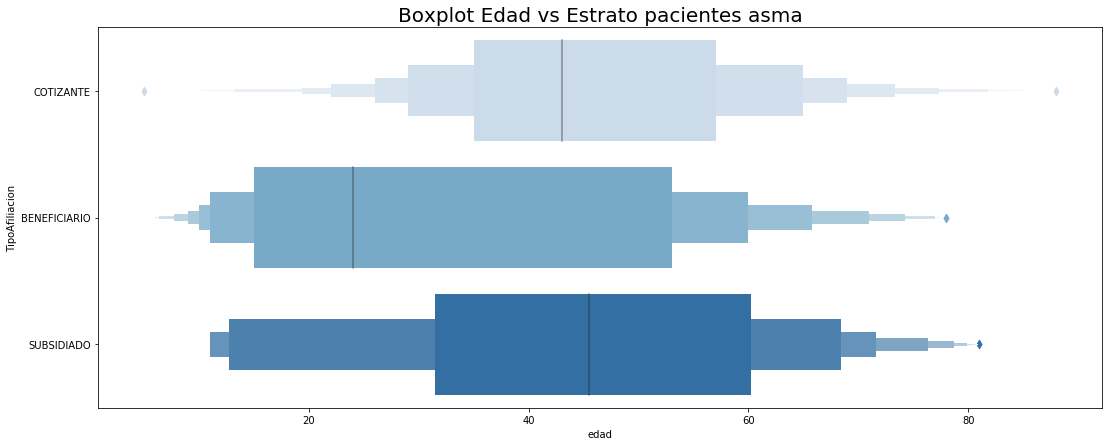

In [58]:
plt.rcParams['figure.figsize'] = (18, 7)
sb.boxenplot(dh['edad'], dh['TipoAfiliacion'], palette = 'Blues')
plt.title('Boxplot Edad vs Estrato pacientes asma', fontsize = 20)
plt.show()

Podemos ver como los datos estan centrados 

Podemos observar tambien como la violencia en el territorio se ve muy impactada en personas jovenes como lo indica el histograma , centrandose en un rango critico entre 18 y 40 años y empieza a disminuir con el paso de los años . De lo anterior podemos inferir que puede estar relacionado a todo  tipo de problematicas sociales como pandillas , territorios y poder.

Uno de los analisis que nos puede dar este estudio es que los hombres tienden a solucionar sus problemas con mayor violencia ya que el 92% del total del 2018 son hombres.

Podemos observar como ha sido la evolución de los asesinatos por mes en picos , donde  el mes 8 correspondiente a Agosto nos muestra como el mes mas peligroso del año y el mes menos peligroso fue Mayo.

# Modelo machine learning


In [294]:
from sklearn.cluster import KMeans #Importamos k means
